In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../output/status_sources.csv')
df.head()

,SERVICE,NOTE,SELF_STATUS_PAGE,SELF_STATUS_SOURCE,SOURCES,ALEXA_POS,MOZ_POS,RANKRANGER_POS,AHREFS_POS,SIMILARWEB_ALL,SIMILARWEB_POS_CAT1,SIMILARWEB_POS_CAT2
0,lyft,NaN,N,-,"0,1,2,3",NaN,NaN,NaN,NaN,NaN,46 Travel-and-tourism,46 health
1,facebook-messenger,NaN,Y,facebook,"0,4,5,3,6,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,trello,NaN,Y,statuspage,"0,7,5,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,netflix,NaN,Y,netflix,"0,5,4,10,1,9",20.0,195.0,30.0,14.0,16.0,2 arts-and-entertainment,NaN
4,facebook,NaN,Y,facebook,"0,7,10,5,4,3,1",6.0,31.0,2.0,2.0,3.0,2 computers-electronics-and-technology,NaN


### Third-party sources of information (all services)

In [16]:
# count occurrences of third-party sources (tps) for all services
# Google query (1st page): <SERVICE> service status
tps_counts = {}
for sources in df['SOURCES']:
    for tps in sources.split(','):
        if tps not in tps_counts.keys():
            tps_counts.update({tps : 1})
        else:
            tps_counts[tps] += 1
print(tps_counts)

{'0': 32, '1': 15, '2': 6, '3': 15, '4': 17, '5': 30, '6': 1, '7': 12, '10': 13, '9': 1, '11': 5, '13': 2, '14': 2, '15': 1, '16': 1, '17': 1, '18': 1}


In [17]:
# update the key names to the actual third party source
new_keys = [['downdetector','0'],['servicesdown','1'],['updownradar','2'],['outage.report','3'],['istheservicedown','4'],['isitdownrightnow','5'],['downhunter','6'],['statusgator','7'],['netflixdown','9'],['downrightnow','10'],['downforeveryoneorjustme','11'],['isdown.app','13'],['uptime','14'],['updownreport','15'],['cloudharmony','16'],['downinspector','17'],['statusticker','18']]
for entry in new_keys:
    tps_counts[entry[0]] = tps_counts.pop(entry[1])
tps_counts = dict(sorted(tps_counts.items(), key=lambda item: item[1], reverse=True))
print(tps_counts)

{'downdetector': 32, 'isitdownrightnow': 30, 'istheservicedown': 17, 'servicesdown': 15, 'outage.report': 15, 'downrightnow': 13, 'statusgator': 12, 'updownradar': 6, 'downforeveryoneorjustme': 5, 'isdown.app': 2, 'uptime': 2, 'downhunter': 1, 'netflixdown': 1, 'updownreport': 1, 'cloudharmony': 1, 'downinspector': 1, 'statusticker': 1}


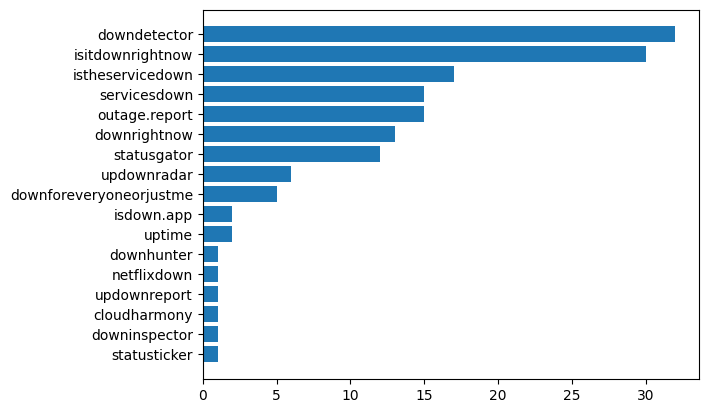

In [60]:
fig, ax = plt.subplots()
ax.barh(range(len(tps_counts)), list(tps_counts.values()), align='center')
plt.yticks(range(len(tps_counts)), list(tps_counts.keys()))
ax.invert_yaxis()
plt.show()

### Third-party sources of information (individual services)

In [61]:
# count the number of third-party sources for each service
tps_per_service = {}
sources = df['SOURCES'].values
for num, service in enumerate(df['SERVICE']):
    tps_per_service.update({service : len(sources[num])})
tps_per_service = dict(sorted(tps_per_service.items(), key=lambda item: item[1], reverse=True))
print(tps_per_service)

{'facebook': 14, 'twitter': 13, 'yahoomail': 13, 'netflix': 12, 'spotify': 12, 'pinterest': 12, 'facebook-messenger': 11, 'linkedin': 11, 'youtube': 11, 'zynga': 10, 'gmail': 10, 'amazon': 10, 'paypal': 9, 'whatsapp': 9, 'instagram': 9, 'reddit': 8, 'hotmail': 8, 'ning': 8, 'blogger': 8, 'typepad': 8, 'airbnb': 8, 'livejournal': 8, 'lyft': 7, 'trello': 7, 'snapchat': 7, 'skype': 7, 'confluence': 6, 'foursquare': 6, 'bitbucket': 5, 'github': 5, 'tumblr': 5, 'opsgenie': 4, 'jira-align': 4, 'slack': 3, 'jira-service-desk': 3, 'jira-core': 3, 'jira-software': 3, 'apple-servers': 1}


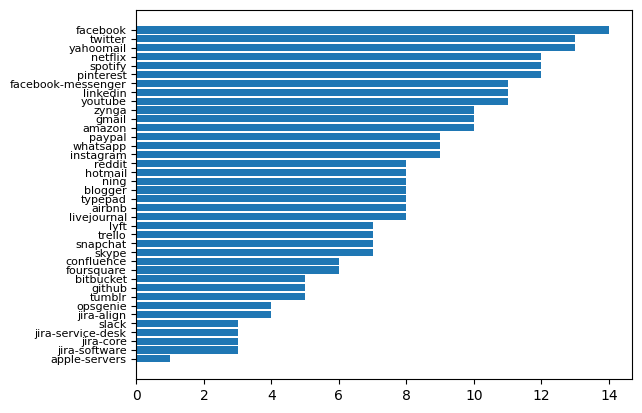

In [83]:
fig, ax = plt.subplots()
ax.barh(range(len(tps_per_service)), list(tps_per_service.values()), align='center')
plt.yticks(range(len(tps_per_service)), list(tps_per_service.keys()))
plt.tick_params(axis='y', which='major', labelsize=8)
ax.invert_yaxis()
plt.show()

### Website rankings

In [84]:
df_ranks = df.iloc[:, 5:10].copy()
df_ranks = df_ranks.set_index(df['SERVICE'])
df_ranks.columns = ['Alexa Top 50', 'Moz Top 500', 'RankRanger Top 100', 'Ahrefs Top 100', 'SimilarWeb Top 50']
df_ranks.dropna(how='all', inplace=True)
df_ranks.head()

,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
netflix,20.0,195.0,30.0,14.0,16.0
facebook,6.0,31.0,2.0,2.0,3.0
reddit,19.0,NaN,NaN,20.0,19.0
hotmail,18.0,46.0,NaN,8.0,15.0
paypal,NaN,75.0,NaN,63.0,NaN


<ipython-input-85-a7b18da1af15>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


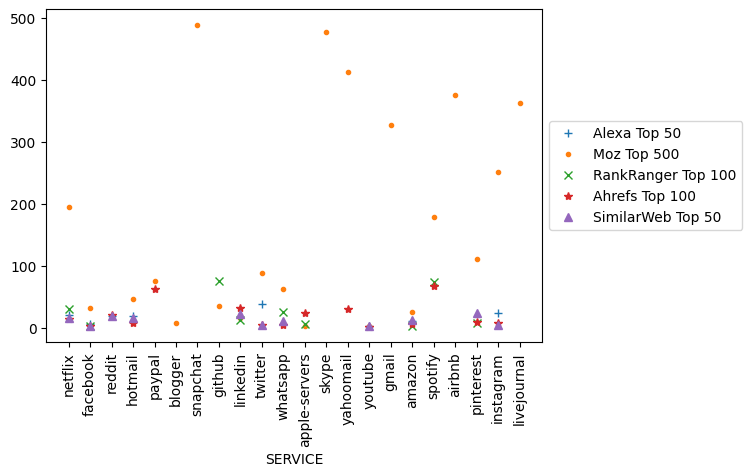

In [85]:
df_ranks.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_ranks.index)), df_ranks.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [86]:
# lets plot only the top 100's
df_100 = df_ranks.apply(lambda x: [y if y <= 100 else np.nan for y in x])
df_100.dropna(how='all', inplace=True)
df_100.head()

,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
netflix,20.0,NaN,30.0,14.0,16.0
facebook,6.0,31.0,2.0,2.0,3.0
reddit,19.0,NaN,NaN,20.0,19.0
hotmail,18.0,46.0,NaN,8.0,15.0
paypal,NaN,75.0,NaN,63.0,NaN


<ipython-input-91-e723924e5551>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


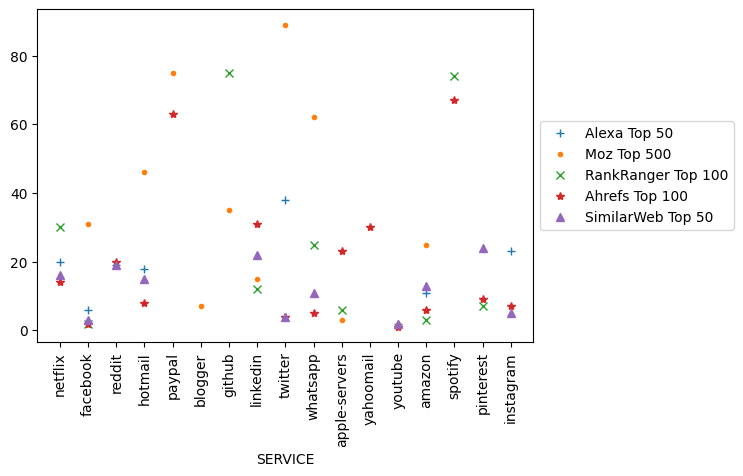

In [91]:
df_100.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_100.index)), df_100.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()